In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [2]:
imsize=128
seed=42
tf.config.experimental.enable_op_determinism()
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.keras.initializers.GlorotNormal(seed)

model_folder='Model/Fe_vs_Fi'

In [3]:
#Loading augmented data generated by datagen_fe_vs_fi.ipynb
train_data_dir='Data_Preprocessing/training_data_numpy_format/Fe_Fi'
trainX=np.load(train_data_dir+'/trainX.npy')
trainY=np.load(train_data_dir+'/trainY.npy')
valX=np.load(train_data_dir+'/valX.npy')
valY=np.load(train_data_dir+'/valY.npy')


In [4]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding="same", input_shape=(imsize, imsize, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

d:\projects\cnn-mp-dos\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,409 (314.10 KB)

 Trainable params: 80,233 (313.41 KB)

 Non-trainable params: 176 (704.00 B)

In [5]:
model_filename = model_folder+'/CNN_Binary_F_Fi_{epoch}.keras'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = model_filename,
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    save_freq='epoch',
    initial_value_threshold=None
)

In [6]:
model.compile(optimizer = "Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [7]:
history = model.fit(trainX,trainY, epochs=50, validation_data=(valX,valY), callbacks=[model_checkpoint])

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.5647 - loss: 0.7267 - val_accuracy: 0.5337 - val_loss: 0.7109
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.6970 - loss: 0.5647 - val_accuracy: 0.5337 - val_loss: 0.7356
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - accuracy: 0.7886 - loss: 0.4611 - val_accuracy: 0.5337 - val_loss: 0.7636
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.8382 - loss: 0.3897 - val_accuracy: 0.5337 - val_loss: 0.9161
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.8720 - loss: 0.3055 - val_accuracy: 0.5337 - val_loss: 1.0449
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - accuracy: 0.9126 - loss: 0.2394 - val_accuracy: 0.5337 - val_loss: 0.9419
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - accuracy: 0.9218 - loss: 0.1989 - val_accuracy: 0.5357 - val_loss: 0.9496
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - accuracy: 0.9530 - loss: 0.1378 - val_accuracy: 0

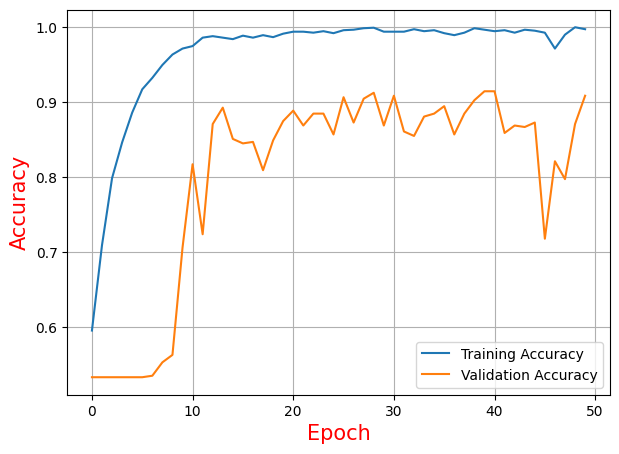

In [8]:
plt.subplots(figsize=(7, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy', color='red', fontsize = 15)
plt.xlabel('Epoch', color='red', fontsize = 15)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

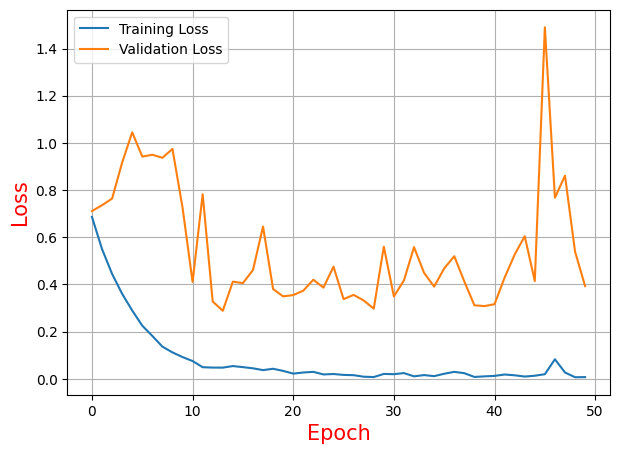

In [9]:
plt.subplots(figsize=(7, 5));
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.ylabel('Loss', color='red', fontsize = 15);
plt.xlabel('Epoch', color='red', fontsize = 15);
plt.legend(['Training Loss', 'Validation Loss']);
plt.grid()

*MODEL EVALUATION: TESTING* 

In [10]:
import re
#Selecting BEST MODEL (BEST ACCURACY)
model_folder='Model/Fe_vs_Fi'
LABELS=['Ferrimagnetic', 'Ferromagnetic']
dir_list = os.listdir(model_folder)
best_epoch=-1
best_model=''
acc_max=-1
actual_class = valY
for filename in dir_list:
    # print(filename)
    model_check = tf.keras.models.load_model(model_folder+'/'+filename)
    predicted_class =((model_check.predict(valX) > .5).astype(int))
    report=classification_report(actual_class, predicted_class, target_names=LABELS,output_dict=True,zero_division=np.nan)
    if report['accuracy']>acc_max:
        best_model=model_folder+'/'+filename
        r=re.findall('[0-9]+', filename)
        best_epoch=int(r[0])        
        acc_max=report['accuracy']

model_eval = tf.keras.models.load_model(best_model)
predicted_class =((model_eval.predict(valX) > .5).astype(int).flatten())

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [11]:
report=classification_report(actual_class, predicted_class, target_names=['Ferrimagnetic', 'Ferromagnetic'])
print('Best model: ', best_model)
print('=======================================================')
print(report)

Best model:  Model/Fe_vs_Fi/CNN_Binary_F_Fi_14.keras
               precision    recall  f1-score   support

Ferrimagnetic       0.85      0.93      0.89       235
Ferromagnetic       0.94      0.86      0.90       269

     accuracy                           0.89       504
    macro avg       0.89      0.90      0.89       504
 weighted avg       0.90      0.89      0.89       504



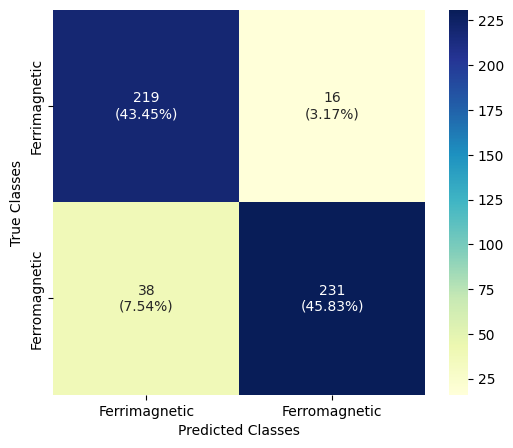

In [12]:
cf_mtx = confusion_matrix(actual_class, predicted_class)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(2,2)

plt.figure(figsize = (6, 5))
sns.heatmap(cf_mtx, xticklabels=LABELS, yticklabels=LABELS,
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

*TRAINING AND VALIDATION ACCURACY*

In [13]:
print(f'Best_epoch: {best_epoch}')
print(f"Training Acc: {history.history['accuracy'][best_epoch]}")
print(f"Validation Acc: {history.history['val_accuracy'][best_epoch]}")

print(f"Training Loss: {history.history['loss'][best_epoch]}")
print(f"Validation Loss: {history.history['val_loss'][best_epoch]}")



Best_epoch: 14
Training Acc: 0.9841269850730896
Validation Acc: 0.851190447807312
Training Loss: 0.05372944474220276
Validation Loss: 0.4115203022956848
